# Categorical Analysis on Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the dataset from the directory

In [2]:
dataframe = pd.read_csv(r"./matches.csv")

The dataset contains all data from 2008 to 2017 IPL with data including Season, Date of match, Toss won, Teams, Season Year and so on and so forth.
Below is the code to describe the data to give an overview of the dataset.

In [3]:
dataframe.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


From the dataset i pick season and city columns as they are categorical data to perform my analysis. 

In [4]:
dataset = dataframe[["season","city"]]

## Frequency Chart

I am analyzing the frequency of matches conducted in each cities in the year of 2017

In [5]:
dataset = dataset[dataset.season == 2017]

Filter out the City (our point of interest) and convert it to numpy array

In [6]:
Dataset = dataset["city"].values

In [7]:
Dataset

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Hyderabad',
       'Mumbai', 'Indore', 'Pune', 'Mumbai', 'Kolkata', 'Bangalore',
       'Rajkot', 'Kolkata', 'Delhi', 'Mumbai', 'Bangalore', 'Delhi',
       'Hyderabad', 'Rajkot', 'Hyderabad', 'Indore', 'Kolkata', 'Mumbai',
       'Pune', 'Rajkot', 'Kolkata', 'Mumbai', 'Pune', 'Bangalore',
       'Kolkata', 'Chandigarh', 'Pune', 'Rajkot', 'Chandigarh',
       'Hyderabad', 'Mumbai', 'Pune', 'Delhi', 'Kolkata', 'Delhi',
       'Bangalore', 'Hyderabad', 'Delhi', 'Bangalore', 'Chandigarh',
       'Hyderabad', 'Chandigarh', 'Kanpur', 'Mumbai', 'Delhi', 'Kanpur',
       'Kolkata', 'Pune', 'Delhi', 'Mumbai', 'Bangalore', 'Bangalore',
       'Hyderabad'], dtype=object)

Plot the frequency of matches conducted in different venues in the year of 2007

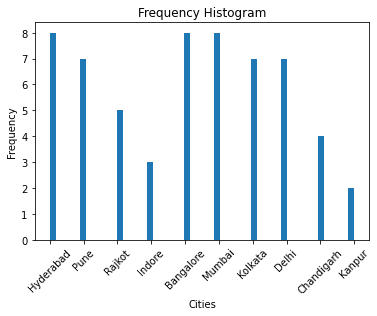

In [8]:
plt.hist(Dataset,bins=50)
plt.xticks(rotation=45)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency',xlabel="Cities");

From the above plot or if there were more venues, then it would have been difficult to draw inferenct such as(one example below):

**which venue has 4th hishest matches conducted India in 2017**

Below code is uses numpy unique library to find the frequency of matches in each venue and then sort it in descending order of matches conducted.

In [9]:
cities,frequency = np.unique(Dataset,return_counts=True)

In [10]:
freq_sorted = np.argsort(-frequency)

In [11]:
cities[freq_sorted]

array(['Bangalore', 'Hyderabad', 'Mumbai', 'Delhi', 'Kolkata', 'Pune',
       'Rajkot', 'Chandigarh', 'Indore', 'Kanpur'], dtype=object)

## Sorted Frequency chart

I have reassigned the dataset to a new dataset variable(dataframe) to avoid modifying the main variable by any chance

In [12]:
dataset2 = dataset

To get the frequency of the cities where the matches where conducted in 2017 in descending order:
* Group by city and assign that column as frequency(freq in code)
* Sort values by frequency in descending ordr 
* For cities with same frequency sort alphabetically 

In [13]:
df = dataset2.assign(freq=dataset2.groupby('city')['city'].transform('count'))\
  .sort_values(by=['freq','city'],ascending=[False,True]).loc[:,['city']]

Check if the cities are sorted based on their frequency

In [14]:
df["city"].values

array(['Bangalore', 'Bangalore', 'Bangalore', 'Bangalore', 'Bangalore',
       'Bangalore', 'Bangalore', 'Bangalore', 'Hyderabad', 'Hyderabad',
       'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad', 'Hyderabad',
       'Hyderabad', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai', 'Mumbai',
       'Mumbai', 'Mumbai', 'Mumbai', 'Delhi', 'Delhi', 'Delhi', 'Delhi',
       'Delhi', 'Delhi', 'Delhi', 'Kolkata', 'Kolkata', 'Kolkata',
       'Kolkata', 'Kolkata', 'Kolkata', 'Kolkata', 'Pune', 'Pune', 'Pune',
       'Pune', 'Pune', 'Pune', 'Pune', 'Rajkot', 'Rajkot', 'Rajkot',
       'Rajkot', 'Rajkot', 'Chandigarh', 'Chandigarh', 'Chandigarh',
       'Chandigarh', 'Indore', 'Indore', 'Indore', 'Kanpur', 'Kanpur'],
      dtype=object)

Plot the data based on decreasing frequency of matches conducted in those venues

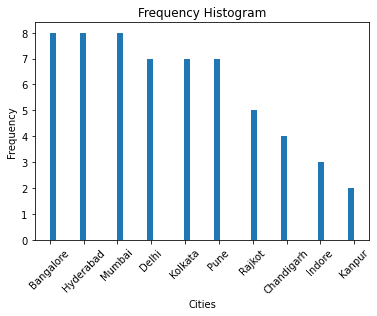

In [15]:
plt.hist(df["city"].values,bins=50)
plt.xticks(rotation=45)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency',xlabel="Cities");

From the above plot it would have been difficult to draw inferenct such as(one example below):

**what percentage of matches where conducted in each venues 2017**

## Relative Frequency Chart

Find the sum of of all matches per venue

In [16]:
df['city'].value_counts().sum()

59

To get the frequency of the cities where the matches where conducted in 2017 in descending order:
* Group by city and assign that column as frequency(freq in code). Divide this by sum of all matches per venue
* Sort values by frequency in descending ordr 
* For cities with same frequency sort alphabetically 

In [17]:
df1 = dataset2.assign(freq=dataset2.groupby('city')['city'].transform('count')/59)\
  .sort_values(by=['freq','city'],ascending=[False,True])

df1

,season,city,freq
4,2017,Bangalore,0.135593
11,2017,Bangalore,0.135593
16,2017,Bangalore,0.135593
29,2017,Bangalore,0.135593
41,2017,Bangalore,0.135593
44,2017,Bangalore,0.135593
56,2017,Bangalore,0.135593
57,2017,Bangalore,0.135593
0,2017,Hyderabad,0.135593
5,2017,Hyderabad,0.135593


Plot the Relative Frequency of matches in each venue in the year 2017

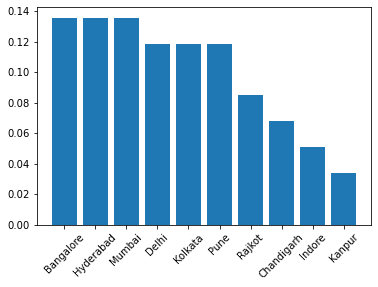

In [18]:
plt.bar(df1['city'].values,df1['freq'].values)
plt.xticks(rotation=45)
plt.show()

## Grouped Frequency Chart

This helps in understanding and comparing by grouping the data and drawing conclusions of how the data has varied based on a given parameter.

*for example: Compare the difference in matches conducted in venues in the year 2015 and 2017*

In [19]:
#choose the season and city columns required for our analysis from the pandas dataframe
x = dataframe[["season","city"]]

#filter the rows to contain data corresponding to the year 2017 & 2015
y = x[(x.season == 2017) | (x.season == 2015)]

#print out the value to confirm if the rows are filtered
y

,season,city
0,2017,Hyderabad
1,2017,Pune
2,2017,Rajkot
3,2017,Indore
4,2017,Bangalore
...,...,...
571,2015,Hyderabad
572,2015,Mumbai
573,2015,Pune
574,2015,Ranchi


In [20]:
#Find the frequency of the matches conducted in each cities per year(2015 & 2017 in my case)
freqMatchesData = y.assign(freq=y.groupby(['season','city'])['city'].transform('count'))

#print the frequency dataframe
freqMatchesData  

,season,city,freq
0,2017,Hyderabad,8
1,2017,Pune,7
2,2017,Rajkot,5
3,2017,Indore,3
4,2017,Bangalore,8
...,...,...,...
571,2015,Hyderabad,4
572,2015,Mumbai,11
573,2015,Pune,4
574,2015,Ranchi,1


Now, consider using pivot_table to pivot the data in *freqMatchesData* dataframe which helps in plotting the grouped frequency plot.

Please read this article for more Referency on pivot_table: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

<AxesSubplot:xlabel='city'>

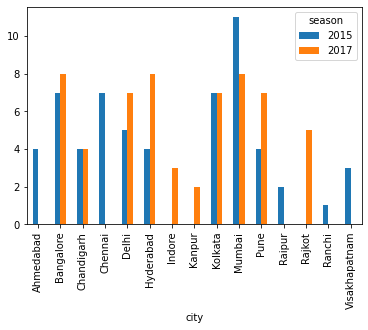

In [21]:
freqMatchesData.pivot_table(index="city",columns="season",values='freq',fill_value=0).plot(kind='bar')

## Relative Grouped Frequency

This helps in analyzing on how the proportion of data has vaired across, based on the parameter in consideration. 

*For Example: How does the percentage of matches conducted in all venues vary in 2015 to that of 2017*

In [22]:
#create new column which stores values of total matches conducted per season. 
ReleativeData = freqMatchesData.assign(sumBySeason = freqMatchesData.groupby('season')['city'].transform('count'))

#Create a relative frequency data by dividing frequency of matches conducted by total matches that season
ReleativeData['rel_freq'] = ReleativeData['freq']/ReleativeData['sumBySeason']

ReleativeData

,season,city,freq,sumBySeason,rel_freq
0,2017,Hyderabad,8,59,0.135593
1,2017,Pune,7,59,0.118644
2,2017,Rajkot,5,59,0.084746
3,2017,Indore,3,59,0.050847
4,2017,Bangalore,8,59,0.135593
...,...,...,...,...,...
571,2015,Hyderabad,4,59,0.067797
572,2015,Mumbai,11,59,0.186441
573,2015,Pune,4,59,0.067797
574,2015,Ranchi,1,59,0.016949


<AxesSubplot:xlabel='city'>

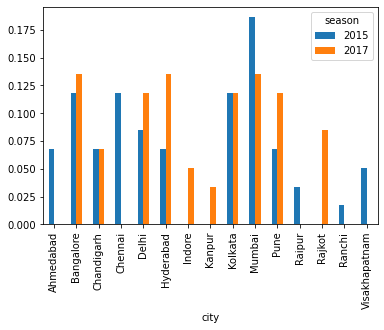

In [23]:
#Create a pivot table with new rows as different cities ans values as releative frequency. Use column headers as current season
# values as before.
ReleativeData.pivot_table(index="city",columns="season",values='rel_freq',fill_value=0).plot(kind='bar')